In [47]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [78]:
def Gprior(a):
    gauss = np.exp(-a**2/2) / np.sqrt(2*np.pi)
    return gauss

def Uprior(a):
    return 1

def LH(t, a, prior):
    d, dt = 100, 0.2
    truth = t*(1+dt*a)
    lh = truth**d / np.math.factorial(d) * np.exp(-truth) * prior(a) 
    return lh


In [79]:
i = np.random.uniform(low=0, high=1, size=(50000,2))
t_rand = i[:, 0]*200
a_rand = (i[:, 1]-0.5) * 10

In [80]:
lh = LH(t_rand, a_rand, Gprior)
#lh = LH(t_rand, a_rand, Uprior)

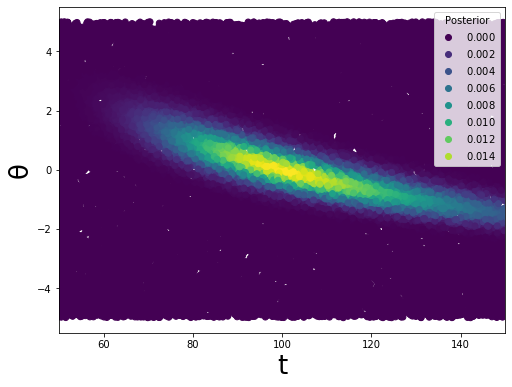

In [81]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(t_rand, a_rand, c=lh)
plt.xlim(50, 150)
plt.xlabel('t', fontsize=26)
plt.ylabel('\u03B8', fontsize=26)

legend1 = plt.legend(*scatter.legend_elements(), prop={'size': 10}, title="Posterior", loc="upper right")
#plt.savefig('bayesian_1bin_1gaussianNP.pdf')

-0.18019196612519287
0.031188488543468784

-0.004478820588227755
-3.2754161314318964e-05


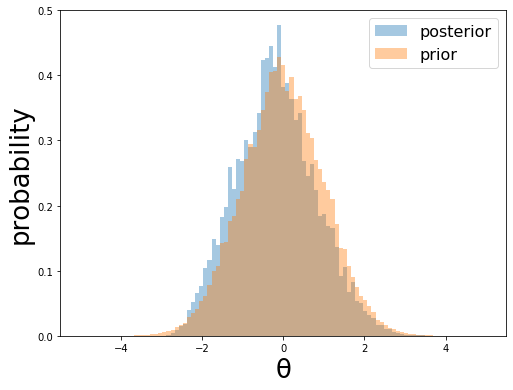

In [82]:
plt.figure(figsize=(8, 6))
plt.hist(a_rand, bins=np.linspace(-5, 5, 100), weights=lh, density=True, alpha=0.4, label='posterior')
plt.xlabel('\u03B8', fontsize=26)
plt.ylabel('probability', fontsize=26)

#plt.hist(a_rand, bins=np.linspace(-5, 5, 100), density=True, alpha=0.4, label='prior')

print(np.sum(a_rand*lh) / np.sum(lh))
print(a_rand[np.argmax(lh)])

plt.hist(a_rand, alpha=0.4, bins=np.linspace(-5, 5, 100), weights=Gprior(a_rand), density=True, label='prior');
print('')
print(np.sum(a_rand*Gprior(a_rand)) / np.sum(Gprior(a_rand)))
print(a_rand[np.argmax(Gprior(a_rand))])

plt.legend(prop={'size': 16})
#plt.savefig('bayesian_1bin_1gaussianNP_marginalised.pdf')

In [196]:
a_max = a_rand[np.argmax(lh)]
t_max = t_rand[np.argmax(lh)]
print(a_max, t_max, LH(t_max, a_max))

1.5613388994509914 145.4049631278296 0.03986099678849608


108.1278124159697

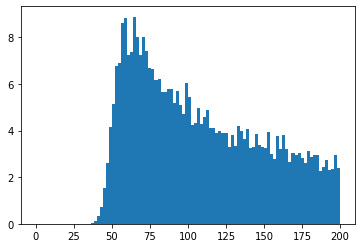

In [197]:
plt.hist(t_rand, 100, weights=lh)
np.sum(t_rand*lh) / np.sum(lh)

80 -2.5058520305033474 0.03989422801280917 -2.5000462724395933
100 0.0035374972331254145 0.0398942279301937 -7.42432075262478e-05
120 1.677527553094932 0.0398942280350315 1.666680006924044


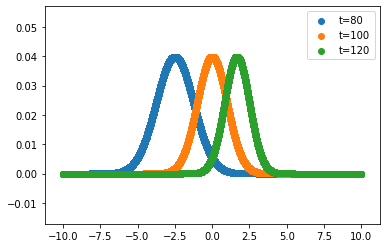

In [104]:
for t in [80, 100, 120]:
    lh_tfixed = LH(t, a_rand)
    plt.scatter(a_rand, lh_tfixed, label='t={:.0f}'.format(t))
    print(t, np.sum(a_rand*lh_tfixed) / np.sum(lh_tfixed), np.max(lh_tfixed), a_rand[np.argmax(lh_tfixed)])
plt.legend();

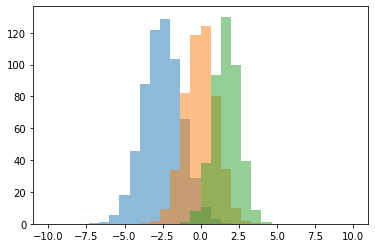

In [105]:
for t in [80, 100, 120]:
    lh_tfixed = LH(t, a_rand)
    plt.hist(a_rand, 30, weights=lh_tfixed, alpha=0.5)
    np.sum(a_rand*lh_tfixed) / np.sum(lh_tfixed)

In [67]:
print(LH(t=100, a=0))
print(LH(t=120, a=1.667))
#print(LH(t=100, a=0))
#print(LH(t=100, a=0))
#print(LH(t=100, a=0))

0.039860996809147134
0.03986099362018248


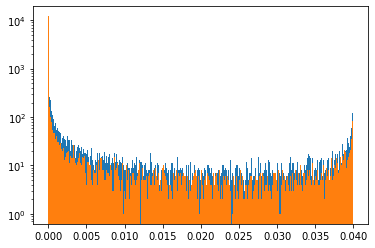

In [95]:
plt.hist(lh[a_rand>2], bins=500, log=True);
plt.hist(lh[a_rand<-2], bins=500, log=True);

(60, 200)

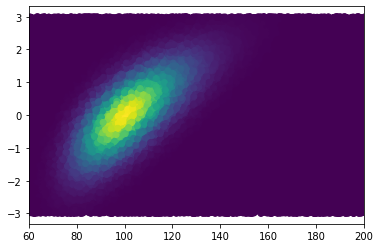

In [68]:
lh = LH(t_rand, a_rand)
plt.scatter(t_rand, a_rand, c=lh*Gprior(a_rand))
plt.xlim(60, 200)

0.00819072629594575

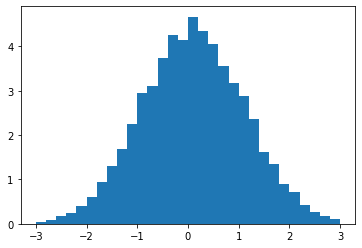

In [71]:
plt.hist(a_rand, 30, weights=lh*Gprior(a_rand))
a_rand[np.argmax(lh*Gprior(a_rand))]